In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import constants
sns.set_context(constants.sns_context)
sns.set_style(constants.sns_style)
data_dir = "/home/cadel/projects/thesis/UNSWThesis/data/synteny"

# Data prep

In [2]:
metadata = pd.read_csv(os.path.join(data_dir, "..", "completeness", "assemblies.tsv"), delimiter="\t", names=["Iteration", "Organism", "Genome", "Stage", "Tools"])
metadata.Genome = metadata.Genome.map(lambda x: x.replace('.fasta', ''))
metadata[metadata.Organism == "sandy"]


,Iteration,Organism,Genome,Stage,Tools
17,1,sandy,sandy.v0a.0.canu,Assembly,Canu
18,2,sandy,sandy.v0a.1.arrow,Polishing,Arrow
19,3,sandy,sandy.v0a.2.purged,Polishing,Purge_Haplotigs?
20,4,sandy,sandy.v0a.3.hic,Scaffolding,3d-dna/Juicebox (I think)
21,5,sandy,sandy.v0a.4.arrow2,Polishing,Arrow
22,6,sandy,sandy.v0a.5.pbjelly,Scaffolding,PBJelly
23,7,sandy,sandy.v0a.6.arrow3,Polishing,Arrow
24,8,sandy,sandy.v0a.7.pilon,Polishing,Pilon
25,9,sandy,sandy.v0a.8.pafscaff,Scaffolding,PAFScaff
26,10,sandy,sandy.v2.0,Tidying,Diploidocus


In [3]:
from functools import reduce
dfs = []
for assembly in constants.assemblies:
    b = pd.read_csv(os.path.join(data_dir, assembly, f"deduce_blocks.csv"))
    b = b[~(b.assembly.isin(constants.excluded))]
    b["assembly"] = b["assembly"].map(lambda x: x.replace(".fasta", ""))
    dfs.append(b)

deduce = reduce(lambda x, acc: pd.concat([x,acc]), dfs)
deduce

,iteration,assembly,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,0,canetoad.v2.2,319,3.413793,3.0,1,19,16.291536,11.0,-3,126
1,1,canetoad.v3.0.flye,327,3.681957,3.0,1,30,18.418960,10.0,-3,203
2,2,canetoad.v3.1.tidy,319,3.796238,3.0,1,30,18.899687,12.0,-3,203
3,3,canetoad.v3.2.hypo,324,3.709877,3.0,1,30,18.459877,11.5,-3,203
4,4,canetoad.v3.3.arcs,307,4.117264,3.0,1,34,20.635179,11.0,-3,231
...,...,...,...,...,...,...,...,...,...,...,...
3,3,step4_scaffolds_gapfilled_FINAL,328,43.981707,9.0,2,482,295.707317,56.0,4,3290
4,4,step5_L_RNA_scaffolder,320,44.762500,8.5,1,482,300.071875,56.0,-3,3292
5,5,step6_L_RNA_scaffolder.polished,324,44.438272,8.0,1,482,297.533951,55.0,-3,3291
6,6,step7_L_RNA_scaffolder.polished.tidy.diploidocus,317,45.842271,9.0,2,482,304.558360,58.0,4,3291


In [4]:
assembly_data = pd.merge(metadata, deduce, how="outer", left_on="Genome", right_on="assembly")

assembly_data = assembly_data[~assembly_data["Iteration"].isna()]
assembly_data

,Iteration,Organism,Genome,Stage,Tools,iteration,assembly,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,0,step1_svulgaris-10x-550M-sub80.1,805,20.436025,6.0,1,341,137.290683,41.0,-3,2333
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,1,step2_svulgaris-10x-550M-sub80.pri,807,20.376704,6.0,1,341,136.858736,39.0,-3,2333
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",2,step3_scaffolds,329,43.775076,9.0,1,482,291.729483,56.0,-3,3291
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",3,step4_scaffolds_gapfilled_FINAL,328,43.981707,9.0,2,482,295.707317,56.0,4,3290
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,4,step5_L_RNA_scaffolder,320,44.762500,8.5,1,482,300.071875,56.0,-3,3292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,35.0,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,25,tigersnake.v2.19c.gapspanner.gapfill,40,31.300000,11.0,1,200,199.825000,66.0,7,1251
64,36.0,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,26,tigersnake.v2.19d.gapspanner,34,35.058824,15.0,1,200,220.294118,96.0,7,1251
65,37.0,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,28,tigersnake.v2.20.hypo3,35,35.685714,13.0,1,200,227.000000,91.0,7,1277
66,38.0,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,29,tigersnake.v2.21a.3d-dna,29,41.137931,8.0,1,228,243.965517,56.0,7,1446


# Basic plots

In [5]:
colour_map = {'Assembly': 'C9', 'Initial assembly': 'C8', 'Mapping': 'C7', 'Gapfilling': 'C6', 'Fixing': 'C5', 'Polishing': 'C4', 'Reduction': 'C3', 'Scaffolding': 'C1', 'Tidying': 'C2'}
# C1: assembly
# C2: scaffolding / fixing / reduction / tidying
# C3: polishing / gapfilling / mapping
simple_colour_map = {'Assembly': 'C1', 'Initial assembly': 'C1', 'Mapping': 'C2', 'Gapfilling': 'C3', 'Fixing': 'C2', 'Polishing': 'C3', 'Reduction': 'C2', 'Scaffolding': 'C2', 'Tidying': 'C2'}
scaff_colour_map = {'Assembly': 'grey', 'Initial assembly': 'grey', 'Mapping': 'grey', 'Gapfilling': 'grey', 'Fixing': 'grey', 'Polishing': 'grey', 'Reduction': 'grey', 'Scaffolding': 'C1', 'Tidying': 'grey'}

def make_plots(organism):
    agg_data = assembly_data[assembly_data.Organism == organism]
    fig1, ax1 = plt.subplots(ncols=1,nrows=1,figsize=(12, 8))
    sns.lineplot(ax=ax1, data=agg_data, x="Iteration", y="avg_score")
    twin = ax1.twinx()
    sns.lineplot(ax=twin, data=agg_data, x="Iteration", y="avg_len",color="orange")
    
    palette = {}
    for row in agg_data.to_records():
        palette[row[1]] = scaff_colour_map[row[4]]

    sns.catplot(data=agg_data, x="Iteration", y="avg_score", kind="bar", palette=palette)
    sns.catplot(data=agg_data, x="Iteration", y="avg_len", kind="bar", palette=palette)
    
    agg_data["avg_score_diff"] = agg_data["avg_score"].diff() 
    agg_data["avg_len_diff"] = agg_data["avg_len"].diff() 
    sns.catplot(data=agg_data, x="Iteration", y="avg_score_diff", kind="bar", palette=palette)
    sns.catplot(data=agg_data, x="Iteration", y="avg_len_diff", kind="bar", palette=palette)


/tmp/ipykernel_6764/1047572873.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_score_diff"] = agg_data["avg_score"].diff()
/tmp/ipykernel_6764/1047572873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_len_diff"] = agg_data["avg_len"].diff()


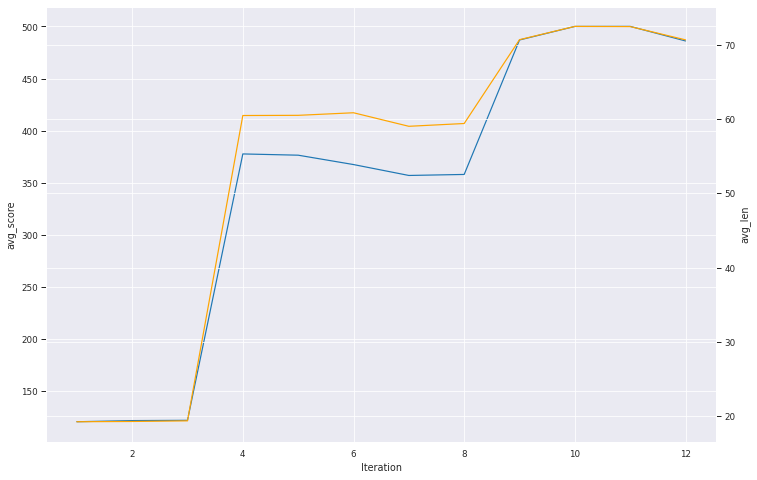

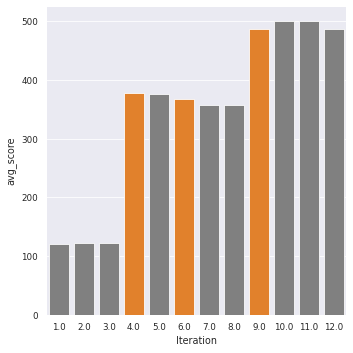

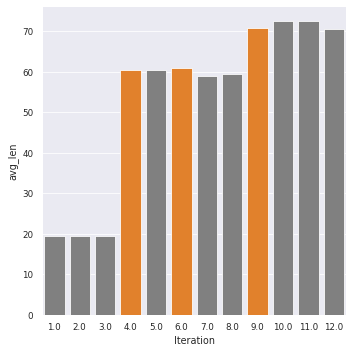

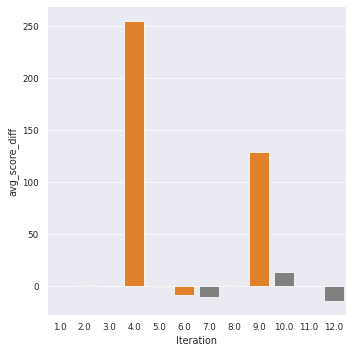

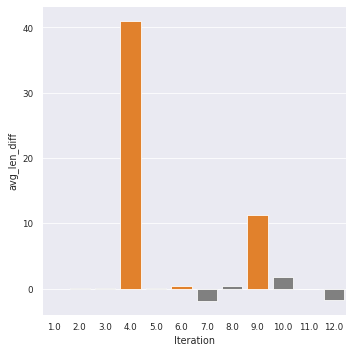

In [6]:
# blue = score, orange = max len
# iteration 8 doesn't increase path length much, but score really improves
make_plots("sandy")

,Iteration,Organism,Genome,Stage,Tools,iteration,assembly,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score,diff,score_diff,len_diff
17,1.0,sandy,sandy.v0a.0.canu,Assembly,Canu,0,sandy.v0a.0.canu,126,19.269841,11.0,2,100,120.761905,70.0,7,693,101.492063,NaN,NaN
18,2.0,sandy,sandy.v0a.1.arrow,Polishing,Arrow,1,sandy.v0a.1.arrow,125,19.304000,11.0,2,100,121.856000,70.0,7,692,102.552000,0.009060,0.001773
19,3.0,sandy,sandy.v0a.2.purged,Polishing,Purge_Haplotigs?,2,sandy.v0a.2.purged,126,19.388889,11.5,2,100,122.119048,70.0,4,693,102.730159,0.002159,0.004397
20,4.0,sandy,sandy.v0a.3.hic,Scaffolding,3d-dna/Juicebox (I think),3,sandy.v0a.3.hic,40,60.450000,52.0,2,160,377.700000,302.5,7,1100,317.250000,2.092884,2.117765
21,5.0,sandy,sandy.v0a.4.arrow2,Polishing,Arrow,4,sandy.v0a.4.arrow2,40,60.475000,52.0,2,160,376.500000,303.0,7,1101,316.025000,-0.003177,0.000414
22,6.0,sandy,sandy.v0a.5.pbjelly,Scaffolding,PBJelly,5,sandy.v0a.5.pbjelly,39,60.820513,52.0,4,160,367.512821,322.0,9,1101,306.692308,-0.023870,0.005713
23,7.0,sandy,sandy.v0a.6.arrow3,Polishing,Arrow,6,sandy.v0a.6.arrow3,40,59.000000,49.5,2,160,357.050000,301.0,7,1072,298.050000,-0.028469,-0.029933
24,8.0,sandy,sandy.v0a.7.pilon,Polishing,Pilon,7,sandy.v0a.7.pilon,40,59.375000,50.0,3,160,358.025000,303.5,9,1072,298.650000,0.002731,0.006356
25,9.0,sandy,sandy.v0a.8.pafscaff,Scaffolding,PAFScaff,8,sandy.v0a.8.pafscaff,40,70.650000,73.5,3,160,487.025000,507.5,14,1070,416.375000,0.360310,0.189895
26,10.0,sandy,sandy.v2.0,Tidying,Diploidocus,9,sandy.v2.0,39,72.435897,77.0,9,160,500.025641,531.0,63,1101,427.589744,0.026694,0.025278


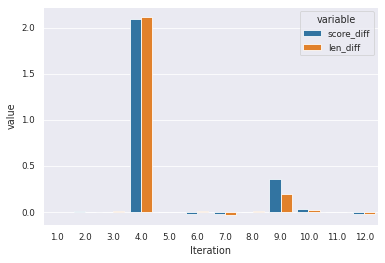

In [7]:
sandy_data = assembly_data[assembly_data.Organism == "sandy"].copy()
sandy_data["diff"] = sandy_data["avg_score"] - sandy_data["avg_len"]
sandy_data["score_diff"] = sandy_data["avg_score"].pct_change()
sandy_data["len_diff"] = sandy_data["avg_len"].pct_change()

fig, ax = plt.subplots()
# plt.fill_between(x, y3, y4, color='grey', alpha='0.5')

sns.barplot(ax=ax,data=sandy_data[["Iteration", "score_diff", "len_diff"]].melt(id_vars=["Iteration"]), x="Iteration", y="value", hue="variable")

#sns.lineplot(ax=ax,data=sandy_data, x="Iteration", y="avg_len")
sandy_data

/tmp/ipykernel_6764/1047572873.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_score_diff"] = agg_data["avg_score"].diff()
/tmp/ipykernel_6764/1047572873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_len_diff"] = agg_data["avg_len"].diff()


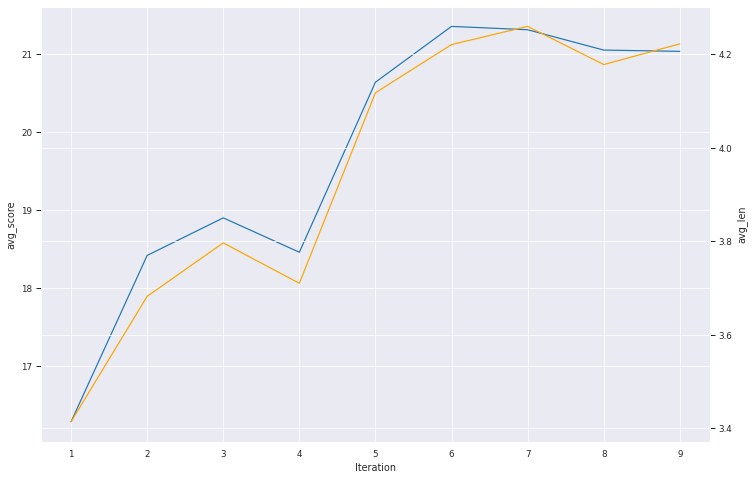

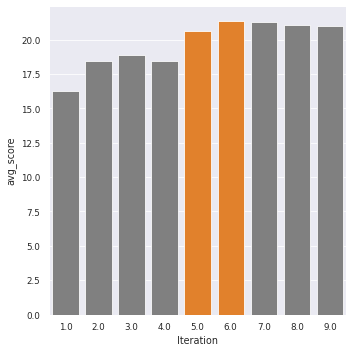

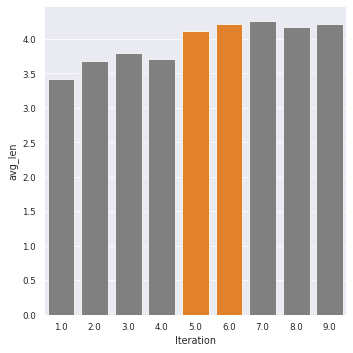

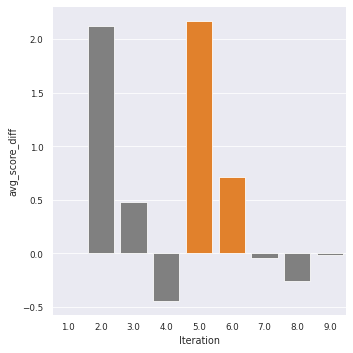

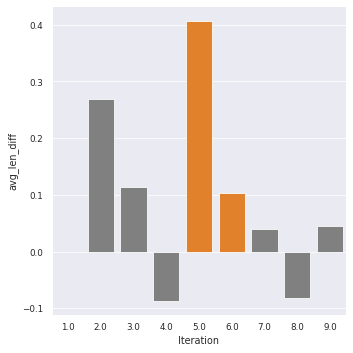

In [8]:
make_plots("canetoad")

/tmp/ipykernel_6764/1047572873.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_score_diff"] = agg_data["avg_score"].diff()
/tmp/ipykernel_6764/1047572873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_len_diff"] = agg_data["avg_len"].diff()


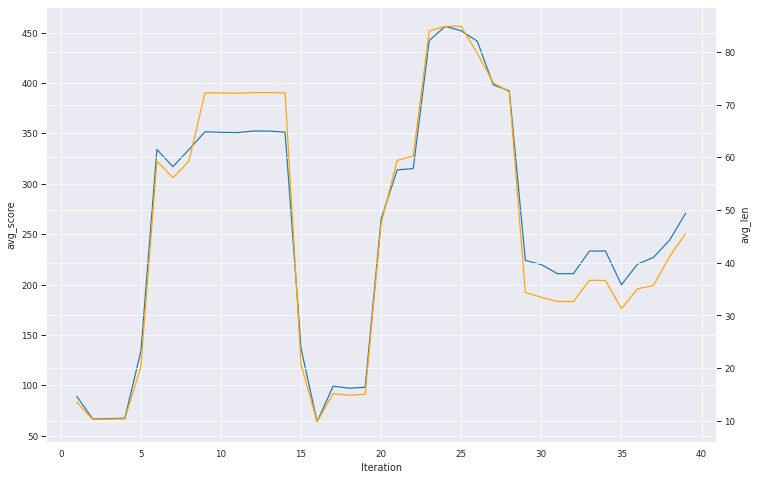

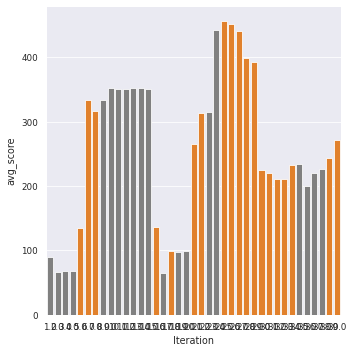

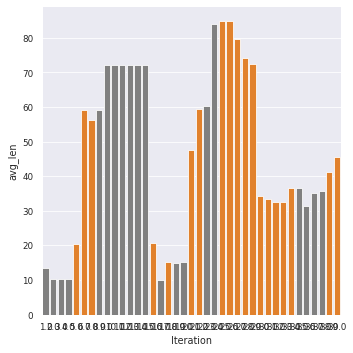

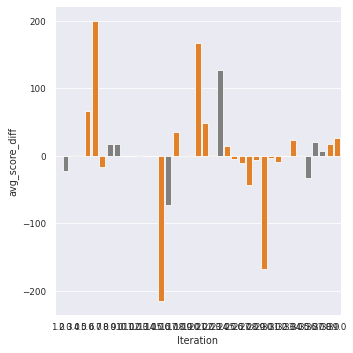

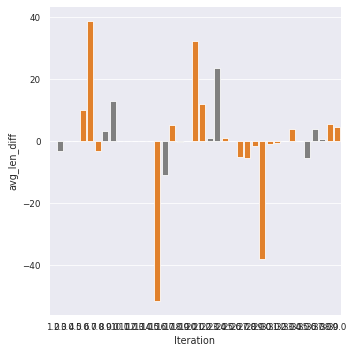

In [9]:
make_plots("tigersnake")

/tmp/ipykernel_6764/1047572873.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_score_diff"] = agg_data["avg_score"].diff()
/tmp/ipykernel_6764/1047572873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data["avg_len_diff"] = agg_data["avg_len"].diff()


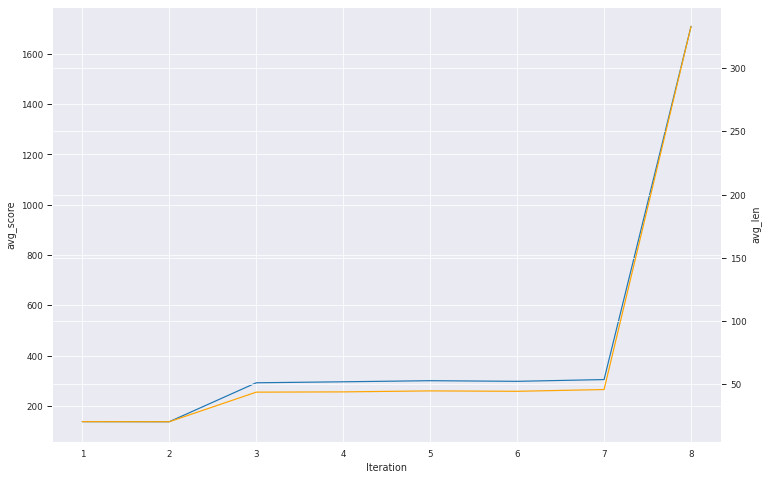

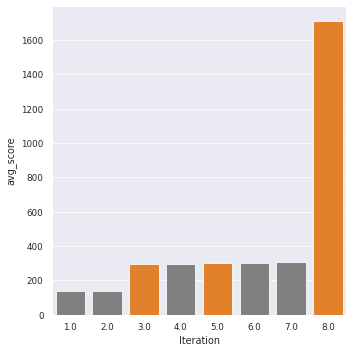

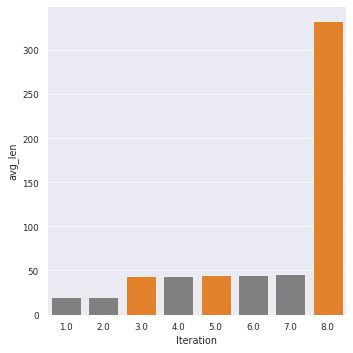

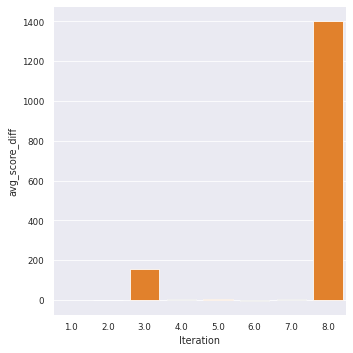

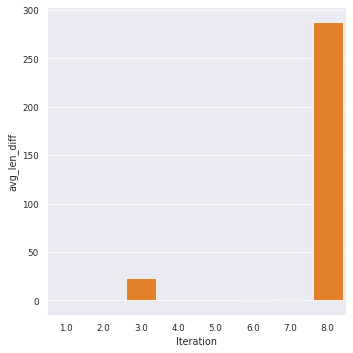

In [10]:
make_plots("starling")

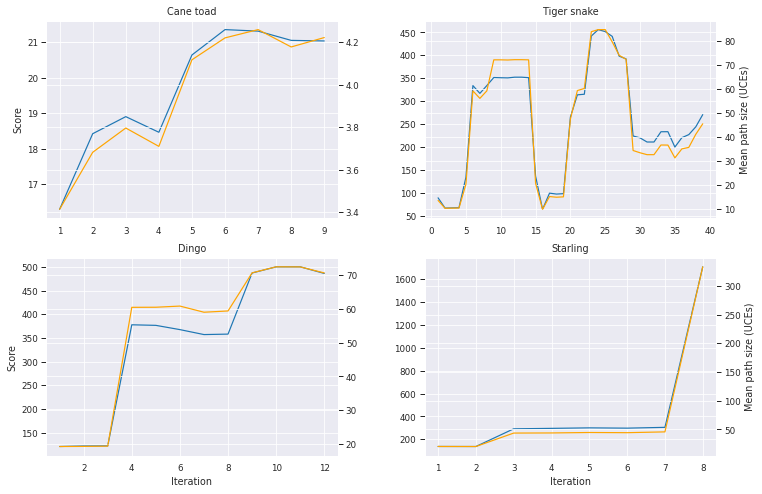

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
fig.subplots_adjust(wspace = 0.3)
nice = {
    "canetoad": "Cane toad",
    "tigersnake": "Tiger snake",
    "sandy": "Dingo",
    "starling": "Starling"
}
asses = ["canetoad", "tigersnake", "sandy", "starling"]
axes = [ax1,ax2,ax3,ax4]

for ass, ax in zip(asses, axes):
    twin = ax.twinx()
    sns.lineplot(ax=ax, data=assembly_data[(assembly_data.Organism==ass)], x="Iteration", y="avg_score")
    sns.lineplot(ax=twin, data=assembly_data[(assembly_data.Organism==ass)], x="Iteration", y="avg_len",color="orange")
    ax.set_title(nice[ass])
    
    if ax in [ax1,ax3]:
        ax.set_ylabel("Score")
    else:
        ax.set_ylabel("")

            
    if ax in [ax2,ax4]:
        twin.set_ylabel("Mean path size (UCEs)")
    else:
        twin.set_ylabel("")

    if ax not in [ax3,ax4]:
        ax.set_xlabel("")
        
fig.savefig(os.path.join(constants.image_out_dir, "blocksbygenomes.pdf"))

# Path length


In [28]:
path_data = assembly_data.copy()
g = path_data.groupby('Organism')
paths = g.tail(1).melt(id_vars=["Iteration","Organism", "Genome"])
sns.catplot(data=paths[paths.variable.isin(["avg_len", "median_len"])], x="Organism", y="avg_len")

,Iteration,Organism,Genome,variable,value
0,8.0,starling,step8_pseudochromosomes,Stage,Scaffolding
1,9.0,canetoad,canetoad.v3.7.tidy,Stage,Tidying
2,12.0,sandy,sandy.v2.2,Stage,Fixing
3,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Stage,Scaffolding
4,8.0,starling,step8_pseudochromosomes,Tools,"Satsuma2, RaGOO"
5,9.0,canetoad,canetoad.v3.7.tidy,Tools,Diploidocus
6,12.0,sandy,sandy.v2.2,Tools,Manual
7,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Tools,Juicer
8,8.0,starling,step8_pseudochromosomes,iteration,7
9,9.0,canetoad,canetoad.v3.7.tidy,iteration,8


# Stats

In [12]:
stats_data = assembly_data.copy()
# https://stackoverflow.com/a/26046920
#stats_data['
stats_data['score_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_score"]
stats_data['score_diff'] = stats_data.groupby('Organism')["score_norm"].transform(lambda x: x.diff()) 

stats_data['len_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_len"]
stats_data['len_diff'] = stats_data.groupby('Organism')["len_norm"].transform(lambda x: x.diff()) 


/tmp/ipykernel_6764/4205941851.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  stats_data['score_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_score"]
/tmp/ipykernel_6764/4205941851.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  stats_data['len_norm'] = stats_data.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())["avg_len"]


<AxesSubplot:xlabel='Stage', ylabel='score_diff'>

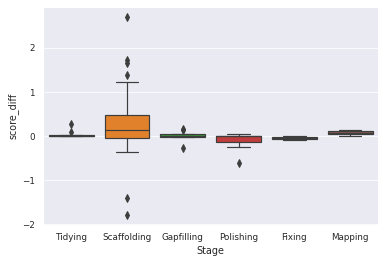

In [13]:
sns.boxplot(data=stats_data[~stats_data.Stage.isin(["Reduction", "Assembly","Initial assembly"])],x="Stage",y="score_diff")

In [14]:
import scipy.stats as ss

ss.ttest_ind(
    stats_data[(stats_data.Stage == "Scaffolding") & ~(stats_data.score_diff.isna())]["len_diff"],
    stats_data[(stats_data.Stage == "Polishing") & ~(stats_data.score_diff.isna())]["len_diff"],alternative='greater')

             

Ttest_indResult(statistic=1.4034258770378794, pvalue=0.08420112393370331)

In [15]:
ss.ttest_1samp(stats_data[(stats_data.Stage == "Scaffolding") & ~(stats_data.score_diff.isna())]["len_diff"], 0, alternative='greater')

Ttest_1sampResult(statistic=1.5119276711412513, pvalue=0.07130643114591788)

In [16]:
stats_data[(stats_data.Stage == "Fixing")]

,Iteration,Organism,Genome,Stage,Tools,iteration,assembly,n_paths,avg_len,median_len,min_len,max_len,avg_score,median_score,min_score,max_score,score_norm,score_diff,len_norm,len_diff
27,11.0,sandy,sandy.v2.1,Fixing,Vecscreen,10,sandy.v2.1,39,72.410256,77.0,9,160,500.076923,531.0,63,1100,1.028778,0.000347,0.876332,-0.001200
28,12.0,sandy,sandy.v2.2,Fixing,Manual,11,sandy.v2.2,40,70.625000,73.5,2,158,486.100000,507.0,7,1039,0.934290,-0.094487,0.792789,-0.083543


In [17]:
scaffolding_stages = ["Scaffolding", "Mapping"]
polishing_stages = ["Tidying", "Fixing", "Polishing"]
gapfilling_stages = ["Gapfilling"]

ss.ttest_1samp(stats_data[(stats_data.Stage.isin(scaffolding_stages)) & ~(stats_data.score_diff.isna())]["score_diff"], 0, alternative='greater')
ss.ttest_1samp(stats_data[(stats_data.Stage.isin(polishing_stages)) & ~(stats_data.score_diff.isna())]["score_diff"], 0, alternative='two-sided')
ss.ttest_1samp(stats_data[(stats_data.Stage.isin(gapfilling_stages)) & ~(stats_data.score_diff.isna())]["score_diff"], 0, alternative='two-sided')

Ttest_1sampResult(statistic=0.011799435367159865, pvalue=0.9909148774488885)

In [18]:
v4 = pd.read_csv("/home/cadel/synteny/sandy/maps/sandy.v0a.4.arrow2.b5a0d8c8cd4fa28ce2f832f67486a376.bed.blocks.bed",delimiter="\t")
v4["iteration"] = "v4"
v5 = pd.read_csv("/home/cadel/synteny/sandy/maps/sandy.v0a.5.pbjelly.3ea9048295a3bbe12288339b2305e10d.bed.blocks.bed",delimiter="\t")
v5["iteration"] = "v5"

comb = pd.concat([v4,v5], ignore_index=True)

sns.displot(data=comb, x="SCORE", col="iteration",bins=20)


ValueError: Could not interpret value `SCORE` for parameter `x`

In [32]:
busco_dfs = []
for assembly in constants.assemblies:
    b = pd.read_csv(os.path.join(data_dir, "..", "completeness", assembly, "busco", "busco.tdt"), delimiter="\t")
    b = b.drop(columns=['#', 'Directory', 'Prefix', 'Fasta', 'Sequences', 'Table', 'Description'])
    b = b[~(b.Genome.isin(constants.excluded))]
    busco_dfs.append(b)

busco = reduce(lambda x, acc: pd.concat([x,acc]), busco_dfs)
busco.head()

,Genome,SeqNum,TotLength,MinLength,MaxLength,MeanLength,MedLength,N50Length,L50Count,CtgNum,...,NG50Length,LG50Count,GapLength,GapCount,GC,N,Duplicated,Complete,Fragmented,Missing
0,canetoad.v2.2,31392.0,2.551760e+09,13.0,3525316.0,81286.957155,38587.5,167498.0,3373.0,31392.0,...,74229.0,8039.0,0.0,0.0,43.23,255,3,238,8,6
1,canetoad.v3.0.flye,34646.0,3.565374e+09,108.0,8272080.0,102908.680656,16372.0,451739.0,1843.0,35140.0,...,451739.0,1843.0,49400.0,494.0,43.76,255,5,243,7,0
2,canetoad.v3.1.tidy,22586.0,3.446282e+09,501.0,8272080.0,152584.863987,45808.0,478898.0,1715.0,23068.0,...,451739.0,1843.0,48200.0,482.0,43.74,255,1,247,7,0
3,canetoad.v3.2.hypo,22586.0,3.452657e+09,500.0,8286251.0,152867.149739,45909.0,479469.0,1716.0,22762.0,...,454170.0,1837.0,17600.0,176.0,43.74,255,1,248,6,0
4,canetoad.v3.3.arcs,14471.0,3.453469e+09,500.0,12576705.0,238647.567134,16847.0,1626478.0,547.0,22762.0,...,1550763.0,582.0,829100.0,8291.0,43.74,255,1,251,3,0




canetoad (n=9)
avg_score SeqNum: -0.92 (0.00050)
avg_score N50Length: 0.93 (0.00024)
avg_score L50Count: -0.99 (0.00000)
avg_score NG50Length: 0.94 (0.00018)
avg_score LG50Count: -0.89 (0.00151)
avg_len SeqNum: -0.94 (0.00015)
avg_len N50Length: 0.96 (0.00006)
avg_len L50Count: -0.98 (0.00000)
avg_len NG50Length: 0.96 (0.00004)
avg_len LG50Count: -0.84 (0.00473)


tigersnake (n=39)
avg_score SeqNum: -0.66 (0.00001)
avg_score N50Length: 0.87 (0.00000)
avg_score L50Count: -0.76 (0.00000)
avg_score NG50Length: 0.87 (0.00000)
avg_score LG50Count: -0.77 (0.00000)
avg_len SeqNum: -0.63 (0.00002)
avg_len N50Length: 0.90 (0.00000)
avg_len L50Count: -0.71 (0.00000)
avg_len NG50Length: 0.91 (0.00000)
avg_len LG50Count: -0.72 (0.00000)


sandy (n=12)
avg_score SeqNum: -0.77 (0.00317)
avg_score N50Length: 0.92 (0.00002)
avg_score L50Count: -0.92 (0.00002)
avg_score NG50Length: 0.92 (0.00002)
avg_score LG50Count: -0.93 (0.00001)
avg_len SeqNum: -0.81 (0.00145)
avg_len N50Length: 0.97 (0.00000)
av

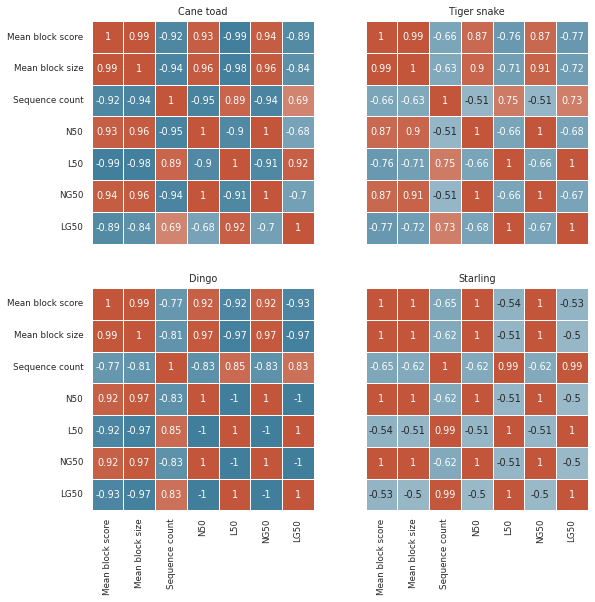

In [36]:
metrics = pd.merge(assembly_data, busco, how="outer", left_on="Genome", right_on="Genome", suffixes=(None, "_busco"))
metrics = metrics[(~metrics.Iteration.isna()) & (~metrics["N"].isna())]
metrics
from scipy.stats import pearsonr

# r, p = pearsonr(metrics["max_len"], metrics["N50Length"])

# def corrfunc(x, y, ax=None, **kws):
#     n=len(x)
#     r, p = pearsonr(x, y)
#     ax = ax or plt.gca()

#     ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)

# #     if p < 0.001 and abs(r) >= 0.7:
# #         kws['color'] = 'tomato'

# #         plt.scatter(x,y,**kws)

# corr_vars = ["avg_score", "avg_len", "max_len", "SeqNum", "N50Length", "L50Count"]
# in_g = sns.pairplot(data=metrics[metrics.Organism == "sandy"], y_vars=corr_vars, x_vars=corr_vars)
# in_g.map(corrfunc)

import itertools

nicenames= {
    "sandy": "Dingo",
    "canetoad": "Cane toad",
    "tigersnake": "Tiger snake",
    "starling": "Starling"
}

#mask = np.triu(np.ones_like(corr, dtype=bool))
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(9, 9))

print_c_vars = ["avg_score","avg_len"]
print_oc_vars = ["SeqNum", "N50Length","L50Count", "NG50Length","LG50Count"]
assemblies = constants.assemblies
for assembly,ax in zip(assemblies, [ax1,ax2,ax3,ax4]):
    print("\n")
    print(f"{assembly} (n={len(metrics[metrics.Organism == assembly])})")
    for x,y in itertools.product(print_c_vars, print_oc_vars):
        rho, p = pearsonr(metrics[metrics.Organism == assembly][x],metrics[metrics.Organism == assembly][y])
        print(f"{x} {y}: {rho:.2f} ({p:.5f})")
        
    corr = metrics[metrics.Organism == assembly][["avg_score", "avg_len", "SeqNum",  "N50Length","L50Count", "NG50Length","LG50Count"]].corr()

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax.set_title(nicenames[assembly])
    sns.heatmap(corr, ax=ax, cmap=cmap, center=0,
                square=True,
                linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, annot=True,
                xticklabels=(ax in [ax3,ax4]),
                yticklabels=(ax in [ax1,ax3]))
    
    if ax in [ax1,ax3]:
        ax.set_yticklabels(["Mean block score", "Mean block size", "Sequence count", "N50", "L50", "NG50", "LG50"])
    if ax in [ax3,ax4]:
        ax.set_xticklabels(["Mean block score", "Mean block size", "Sequence count", "N50", "L50", "NG50", "LG50"])
f.savefig(os.path.join(constants.image_out_dir, "block_corr.pdf"))

# Plotting block positions


In [164]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import BasicChromosome
from Bio import SeqIO
from IPython.core.display import Image
import Bio
import csv

def make_coverage(organism_name, fai, blocks, chromosome_filter = lambda x:"CHR" in x, format_name = lambda name: name.replace("SANDYCHR", "").split(".")[0]):
    with open(fai) as f:
        sandy_chromosomes = {line[0]:int(line[1]) for line in csv.reader(f, delimiter="\t")}
    with open(fai) as f:
        overall_length = sum(int(line[1]) for line in csv.reader(f, delimiter="\t") if chromosome_filter(line[0]))
    with open(fai) as f:
        total_length = sum(int(line[1]) for line in csv.reader(f, delimiter="\t"))

    chr_diagram = BasicChromosome.Organism(output_format="png")
    chr_diagram.page_size = (29.7*cm, 21*cm)

    def draw_chr(length, name, features, max_len, tel_len=1000000, default_color='rgba(255,0,0,1)'):
        cur_chromosome = BasicChromosome.Chromosome(format_name(name))
        cur_chromosome.title_size = 10
        cur_chromosome.scale_num = max_len + 2 * tel_len

        start = BasicChromosome.TelomereSegment()
        start.scale = tel_len
        cur_chromosome.add(start)

        body = BasicChromosome.AnnotatedChromosomeSegment(length, features, default_feature_color=colors.toColor(default_color))
        body.scale = length
        cur_chromosome.add(body)

        end = BasicChromosome.TelomereSegment(inverted=True)
        end.scale = tel_len
        cur_chromosome.add(end)

        return cur_chromosome

    dingo_blocks = pd.read_csv(blocks,delimiter="\t").to_records()
    
    dingo_features = [
        (block[1], Bio.SeqFeature.SeqFeature(Bio.SeqFeature.FeatureLocation(int(block[2]), int(block[3]))))
        for block in dingo_blocks if chromosome_filter(block[1]) ]
    
    coverage_len = sum(
        abs(int(block[2]) - int(block[3])) for block in dingo_blocks if chromosome_filter(block[1])
    )
    
    def sortit(x):
        try:
            return int(x)
        except:
            return 10000

    max_len = max([len(x[1].location) for x in dingo_features])
    for contig, features in sorted(dingo_features, key=lambda x: sortit(format_name(x[0]))):
        chr_diagram.add(draw_chr(length=sandy_chromosomes[contig],max_len=max_len, name=contig, features=[features]))

    chr_diagram.draw(os.path.join(constants.image_out_dir, f"block_coverage_{organism_name}.png"), f"{organism_name}; chromosomes with syntenic blocks")
    
    print(organism_name)
    print("Overall:", overall_length)
    print("Coverage:", coverage_len)
    print("Coverage %:", coverage_len / overall_length * 100)
    return organism_name, coverage_len, overall_length, total_length

coverage_records = []
coverage_records.append(make_coverage("Dingo", "/home/cadel/projects/thesis/UNSWThesis/data/synteny/sandy/block_genome.fai","/home/cadel/projects/thesis/UNSWThesis/data/synteny/sandy/final_blocks.bed"))
coverage_records.append(make_coverage("Starling", "/home/cadel/projects/thesis/UNSWThesis/data/synteny/starling/block_genome.fasta.fai","/home/cadel/projects/thesis/UNSWThesis/data/synteny/starling/final_blocks.bed", chromosome_filter=lambda x: "chromosome" in x))
coverage_records.append(make_coverage("Cane toad", "/home/cadel/projects/thesis/UNSWThesis/data/synteny/canetoad/block_genome.fasta.fai","/home/cadel/projects/thesis/UNSWThesis/data/synteny/canetoad/final_blocks.bed", chromosome_filter=lambda x: True))
coverage_records.append(make_coverage("Tiger snake", "/home/cadel/projects/thesis/UNSWThesis/data/synteny/tigersnake/block_genome.fasta.fai","/home/cadel/projects/thesis/UNSWThesis/data/synteny/tigersnake/final_blocks.bed", chromosome_filter=lambda x: True))

#Image(os.path.join(constants.image_out_dir, f"block_coverage_sandy.png"))


Dingo
Overall: 2337847818
Coverage: 1870991188
Coverage %: 80.0304952954812
Starling
Overall: 1034681181
Coverage: 768021774
Coverage %: 74.22786729896076
Cane toad
Overall: 3473312653
Coverage: 143972095
Coverage %: 4.145094593648146
Tiger snake
Overall: 1505009686
Coverage: 625132353
Coverage %: 41.53676609626817


# Calculating coverage

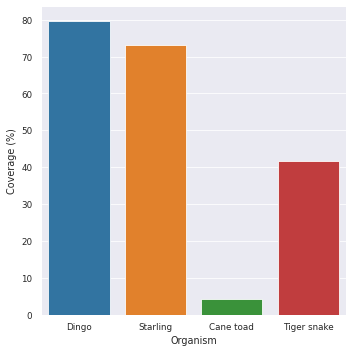

In [165]:
cov_df = pd.DataFrame.from_records(coverage_records,columns=["Organism", "covered_len", "chromosome_len", "total_len"])


cov_df["Total coverage"] = cov_df.covered_len / cov_df.total_len * 100
cov_df["Chromosome coverage"] = cov_df.covered_len / cov_df.chromosome_len * 100

fig = sns.catplot(data=cov_df, x="Organism", y="Total coverage", kind="bar")
fig.ax.set_ylabel("Coverage (%)")
fig.savefig(os.path.join(constants.image_out_dir, "blockcoverage.pdf"))

# Path length distributions

In [166]:
block_dfs = []
for ass in assemblies:
    fname = f"/home/cadel/projects/thesis/UNSWThesis/data/synteny/{ass}/final_blocks.bed"
    d = pd.read_csv(fname, delimiter="\t", names=["contig", "start", "end", "size", "score","start_uce", "end_uce"])
    d["Organism"] = nice[ass]
    block_dfs.append(d)
blocks_df = reduce(lambda x, acc: pd.concat([x,acc]), block_dfs)
blocks_df["length"] = blocks_df["end"] - blocks_df["start"]
blocks_df = blocks_df.reset_index()

ValueError: Could not interpret value `organism` for parameter `hue`

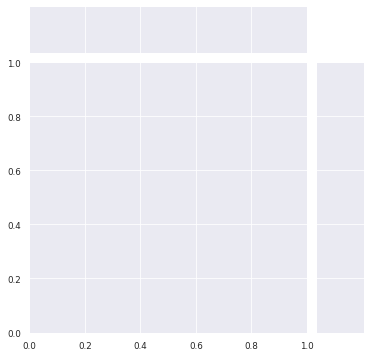

In [168]:
blocks_df["log_length"] = np.log(blocks_df["length"])
blocks_df["log_size"] = np.log(blocks_df["size"])
g = sns.jointplot(data=blocks_df, x="log_length", y="log_size", hue="organism")
# g.ax_joint.set_xscale('log')
# g.ax_joint.set_yscale('log')
# g.ax_marg_x.set_yscale('log')
# g.ax_marg_y.set_xscale('log')

In [160]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
#https://stackoverflow.com/a/47664533
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())


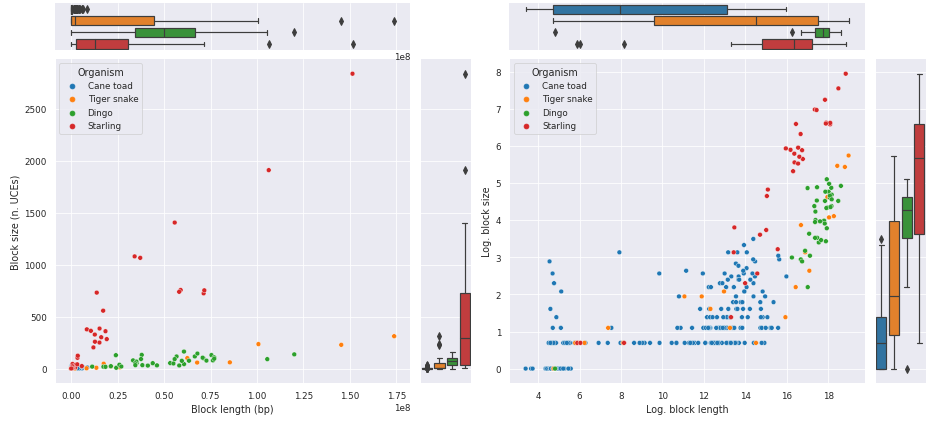

In [169]:
g1 = sns.JointGrid(data=blocks_df, x="length", y="size", hue="Organism")
g2 = sns.JointGrid(data=blocks_df, x="log_length", y="log_size", hue="Organism")

def marginal_boxplot(a, vertical=False, **kws):
    frame = { 'organism': kws["hue"], 'x': a }
    f = pd.DataFrame(frame)

    g = sns.boxplot(data=f, y="x", x="organism", orient="v") if vertical else sns.boxplot(data=f, x="x" ,y="organism",orient="h")
    g.set_ylabel("")
    g.set_xlabel("")

g1.plot_joint(sns.scatterplot)
g1.plot_marginals(marginal_boxplot)
g1.ax_joint.set_ylabel("Block size (n. UCEs)")
g1.ax_joint.set_xlabel("Block length (bp)")

g2.plot_joint(sns.scatterplot)
g2.plot_marginals(marginal_boxplot)
g2.ax_joint.set_ylabel("Log. block size")
g2.ax_joint.set_xlabel("Log. block length")

fig = plt.figure(figsize=(13,6))

gs = gridspec.GridSpec(1, 2)

mg0 = SeabornFig2Grid(g1, fig, gs[0])
mg1 = SeabornFig2Grid(g2, fig, gs[1])
gs.tight_layout(fig)
fig.savefig(os.path.join(constants.image_out_dir, "block_dist.pdf"))